In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

CC = "monax"

data = {}
data["Time (s)"] = []
data["Throughput (Mbps)"] = []
data["Flow"] = []

df = pd.read_csv("./model_A_dataset.csv")
base_delay = df["base_delay"]
control_interval = df["control_interval"]
precision = df["result"]

fix_delay_data = {}
fix_interval_data = {}

for i in range(51):
    fix_delay_data[i] = {}
    fix_delay_data[i]["control_interval"] = []
    fix_delay_data[i]["precision"] = []

for i in range(101):
    fix_interval_data[i] = {}
    fix_interval_data[i]["base_delay"] = []
    fix_interval_data[i]["precision"] = []
    
for i in range(5000):
    row = df.iloc[i]
    base_delay = row[0]
    control_interval = row[1]
    precision = row[2]
    
    fix_delay_data[base_delay]["control_interval"].append(control_interval)
    fix_delay_data[base_delay]["precision"].append(precision)
    
    fix_interval_data[control_interval]["base_delay"].append(base_delay)
    fix_interval_data[control_interval]["precision"].append(precision)

5000

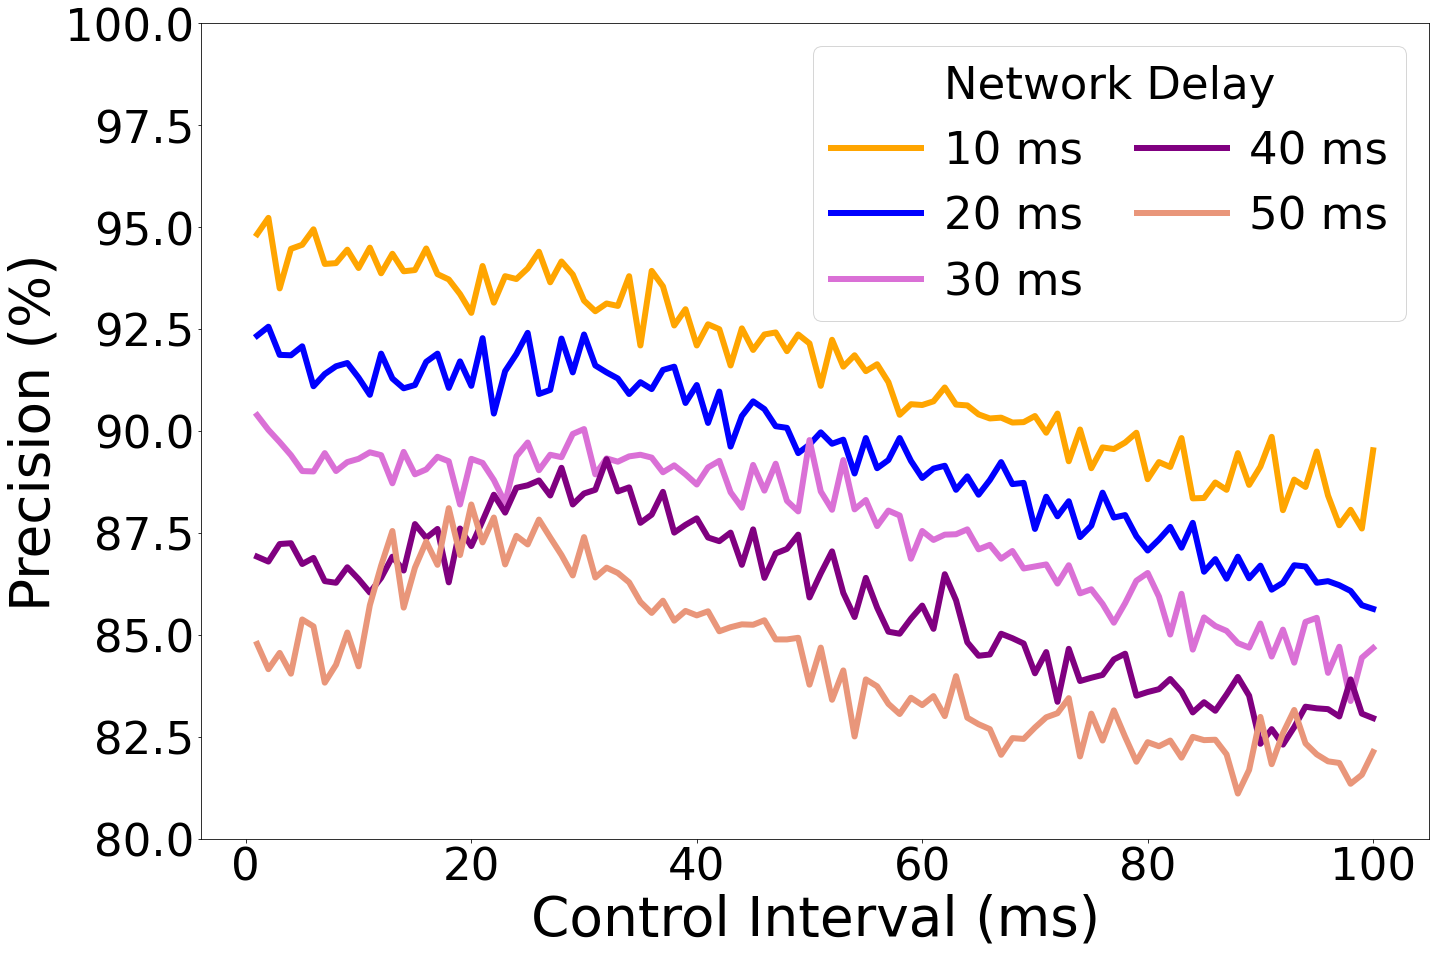

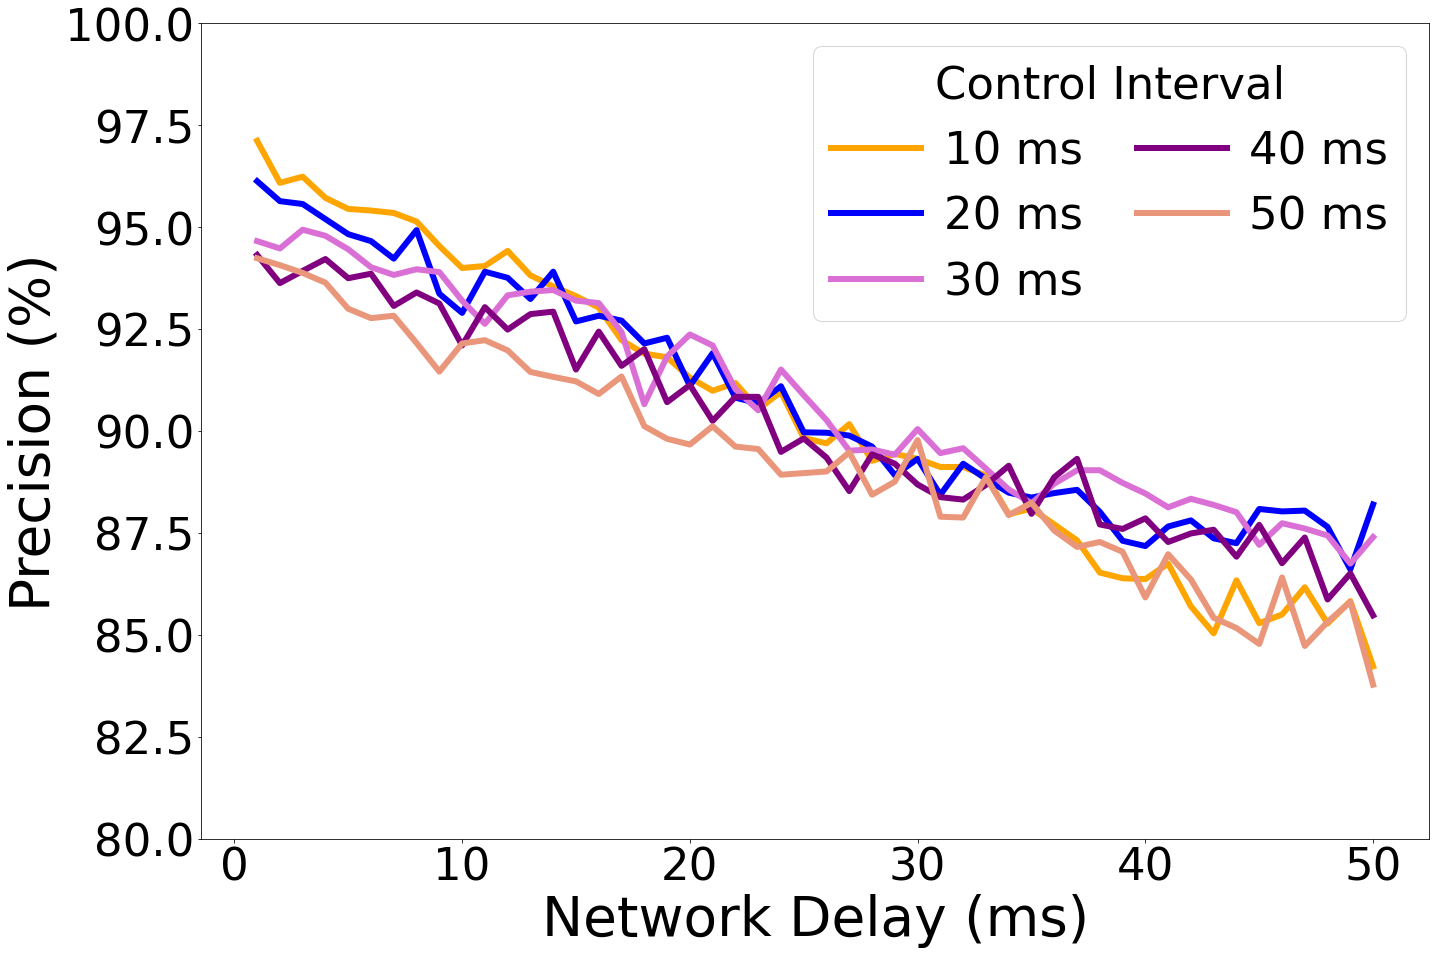

In [75]:
# FIX_DATA = "base_delay"
FIX_DATA = "control_interval"

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 6

FIG_SIZE = (22, 15)

TITLE_FONTSIZE = 45
LEGEND_FONTSIZE = 45

LABEL_FONTSIZE = 55
STICKS_FONTSIZE = 45



fig, axes = plt.subplots(1, 1, figsize=FIG_SIZE)
axes.plot(fix_delay_data[10]["control_interval"], fix_delay_data[10]["precision"], color='orange', label="10 ms",  linewidth=LINE_WIDTH)
axes.plot(fix_delay_data[20]["control_interval"], fix_delay_data[20]["precision"], color='blue', label="20 ms", linewidth=LINE_WIDTH)
axes.plot(fix_delay_data[30]["control_interval"], fix_delay_data[30]["precision"], color='orchid', label="30 ms", linewidth=LINE_WIDTH)
axes.plot(fix_delay_data[40]["control_interval"], fix_delay_data[40]["precision"], color='purple', label="40 ms", linewidth=LINE_WIDTH)
axes.plot(fix_delay_data[50]["control_interval"], fix_delay_data[50]["precision"], color='darksalmon', label="50 ms", linewidth=LINE_WIDTH)

plt.legend(loc=1, title="Network Delay", ncol=2, fontsize=LEGEND_FONTSIZE, bbox_to_anchor = (1,1), title_fontsize=TITLE_FONTSIZE, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Control Interval (ms)",fontsize=LABEL_FONTSIZE)
plt.ylabel("Precision (%)",fontsize=LABEL_FONTSIZE)

# plt.xlim(70,120)
plt.ylim(80,100)

#设置坐标刻度字体大小
plt.xticks(fontsize=STICKS_FONTSIZE)
plt.yticks(fontsize=STICKS_FONTSIZE)

# plt.title(f"")
plt.savefig(f"./fix_delay.png",bbox_inches = 'tight')
plt.show()


fig, axes = plt.subplots(1, 1, figsize=FIG_SIZE)
axes.plot(fix_interval_data[10]["base_delay"], fix_interval_data[10]["precision"], color='orange', label="10 ms",  linewidth=LINE_WIDTH)
axes.plot(fix_interval_data[20]["base_delay"], fix_interval_data[20]["precision"], color='blue', label="20 ms", linewidth=LINE_WIDTH)
axes.plot(fix_interval_data[30]["base_delay"], fix_interval_data[30]["precision"], color='orchid', label="30 ms", linewidth=LINE_WIDTH)
axes.plot(fix_interval_data[40]["base_delay"], fix_interval_data[40]["precision"], color='purple', label="40 ms", linewidth=LINE_WIDTH)
axes.plot(fix_interval_data[50]["base_delay"], fix_interval_data[50]["precision"], color='darksalmon', label="50 ms", linewidth=LINE_WIDTH)

plt.legend(loc=1, title="Control Interval", ncol=2, fontsize=LEGEND_FONTSIZE, bbox_to_anchor = (1,1), title_fontsize=TITLE_FONTSIZE, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Network Delay (ms)",fontsize=LABEL_FONTSIZE)
plt.ylabel("Precision (%)",fontsize=LABEL_FONTSIZE)

plt.ylim(80,100)

#设置坐标刻度字体大小
plt.xticks(fontsize=STICKS_FONTSIZE)
plt.yticks(fontsize=STICKS_FONTSIZE)

# plt.title(f"")
plt.savefig(f"./fix_control_interval.png",bbox_inches = 'tight')
plt.show()
    